<a href="https://colab.research.google.com/github/shatlykgurdov/3.1.2/blob/main/2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLEAN DATA
Intercept: 4.992540020175753
Slope: 2.986927501643894
R2: 0.9886608393039376
MSE: 0.940051503155865

WITH OUTLIERS
Intercept: 8.253473768764092
Slope: 2.7563120990804264
R2: 0.4656737708639481
MSE: 80.0848205206974


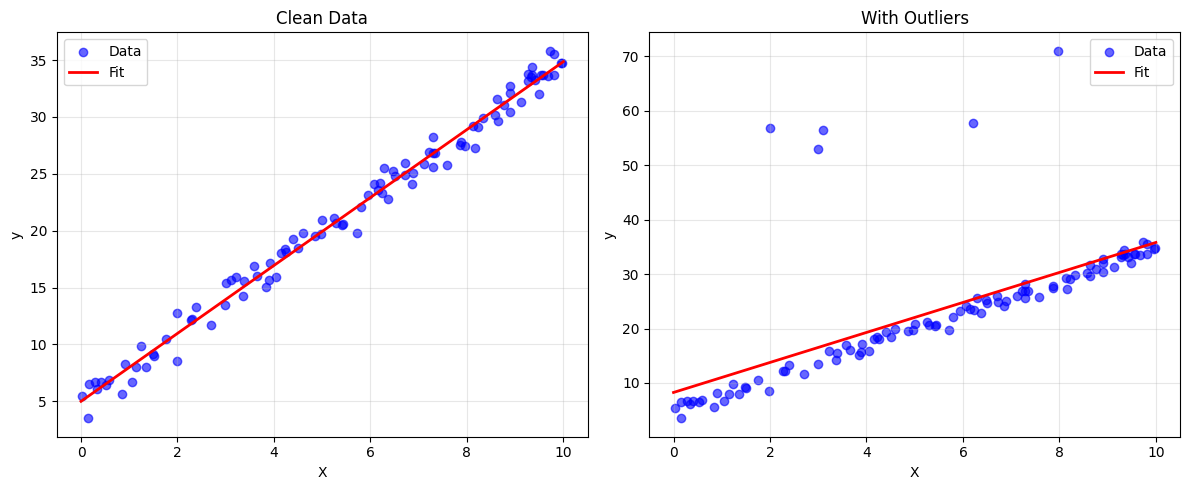


CLEAN DATA MODEL SUMMARY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8545.
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           3.82e-97
Time:                        12:55:33   Log-Likelihood:                -138.80
No. Observations:                 100   AIC:                             281.6
Df Residuals:                      98   BIC:                             286.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9925    

In [1]:
# GWP1 Problem 2b

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

rng = np.random.default_rng(0)

# 1) Generate clean linear data
n_samples = 100
X = rng.uniform(0, 10, size=(n_samples, 1))
noise = rng.normal(0, 1, size=n_samples)
y = 3 * X.ravel() + 5 + noise # true slope = 3, intercept = 5

# Fit linear regression on clean data
lin_clean = LinearRegression()
lin_clean.fit(X, y)
y_pred_clean = lin_clean.predict(X)

print("CLEAN DATA")
print("Intercept:", lin_clean.intercept_)
print("Slope:", lin_clean.coef_[0])
print("R2:", r2_score(y, y_pred_clean))
print("MSE:", mean_squared_error(y, y_pred_clean))

# 2) Make a copy and inject outliers
X_out = X.copy()
y_out = y.copy()

n_outliers = 5
idx = rng.choice(n_samples, size=n_outliers, replace=False)

# Extreme y-values at existing X
y_out[idx] = y_out[idx] + rng.normal(40, 5, size=n_outliers)

# Fit linear regression on contaminated data
lin_out = LinearRegression()
lin_out.fit(X_out, y_out)
y_pred_out = lin_out.predict(X_out)

print("\nWITH OUTLIERS")
print("Intercept:", lin_out.intercept_)
print("Slope:", lin_out.coef_[0])
print("R2:", r2_score(y_out, y_pred_out))
print("MSE:", mean_squared_error(y_out, y_pred_out))

import matplotlib.pyplot as plt

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Clean data plot
ax1.scatter(X, y, alpha=0.6, color='blue', label='Data')
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
ax1.plot(x_range, lin_clean.predict(x_range), color='red', linewidth=2, label='Fit')
ax1.set_title('Clean Data')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Outlier data plot
ax2.scatter(X_out, y_out, alpha=0.6, color='blue', label='Data')
ax2.plot(x_range, lin_out.predict(x_range), color='red', linewidth=2, label='Fit')
ax2.set_title('With Outliers')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

import statsmodels.api as sm

# Clean data model with significance
X_clean_sm = sm.add_constant(X)  # Adds intercept column
model_clean = sm.OLS(y, X_clean_sm).fit()
print("\nCLEAN DATA MODEL SUMMARY:")
print(model_clean.summary())

# Outlier data model with significance
X_out_sm = sm.add_constant(X_out)
model_out = sm.OLS(y_out, X_out_sm).fit()
print("\nOUTLIER DATA MODEL SUMMARY:")
print(model_out.summary())
